In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [13]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ['date'], index_col = 'date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [14]:
# Clean data
df = df[
    (df['value'] >= df['value'].quantile(0.025))&(df['value'] <= df['value'].quantile(0.925))
]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-10-14,118108
2019-10-19,116900
2019-11-02,118347


In [4]:
def draw_line_plot():
    fig,ax = plt.subplots(figsize = (10,5))
    ax.plot(df.index, df['value'],'r--', linewidth = 1)
    
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')



    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig


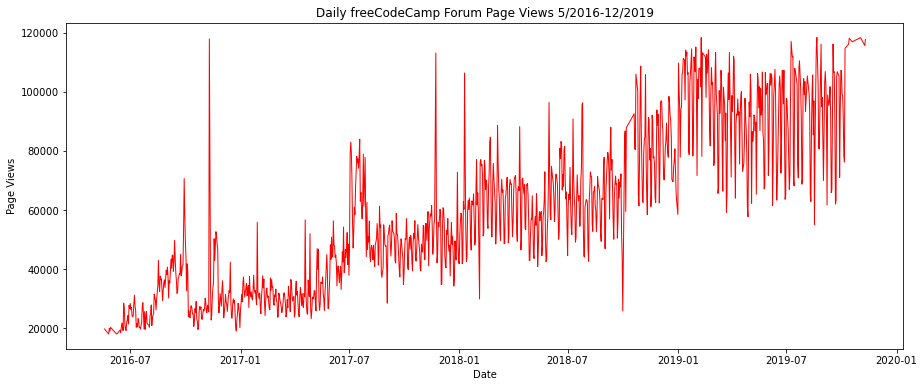

In [5]:
fig,ax = plt.subplots(figsize = (15,6))
ax.plot(df.index, df['value'],'r', linewidth = 1)
    
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

plt.show()

In [6]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df['month'] = df.index.month
    df['year'] = df.index.year
    df_bar = df.groupby(['year', 'month'])['value'].mean()
    df_bar = df_bar.unstack()

    # Draw bar plot
    fig = df_bar.plot.bar(legend=True, figsize=(13,6), xlabel = 'Years', ylabel = 'Average Page Views').figure
    plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'September', 'October', 'November','December'])
    
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)


    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

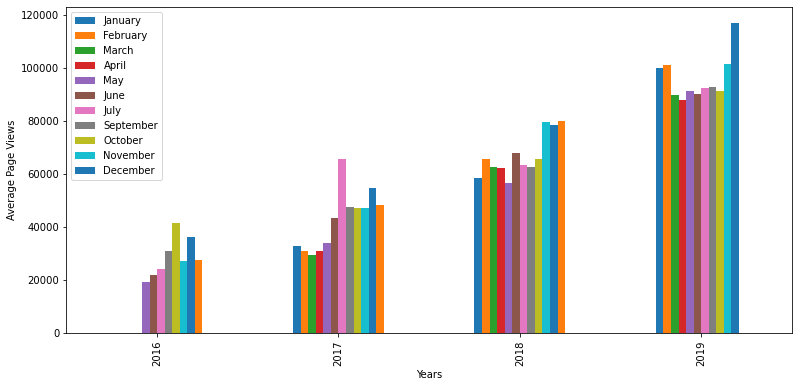

In [7]:
df['month'] = df.index.month
df['year'] = df.index.year
df_bar = df.groupby(['year', 'month'])['value'].mean()
df_bar = df_bar.unstack()

# Draw bar plot
fig = df_bar.plot.bar(legend=True, figsize=(13,6), xlabel = 'Years', ylabel = 'Average Page Views').figure
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'September', 'October', 'November','December'])
    
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

In [8]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    
    # df_box['month_num'] = df_box['date'].dt.month
    # df_box = df_box.sort_values['month_num']
    
    fig, axes = plt.subplots(nrow = 1, ncol = 2, figsize = (10,5))
    axes[0] = sns.boxplot(x = df_box['year'], y = df_box['value'], ax = axes[0])
    axes[1] = sns.boxplot(x = df_box['month'], y = df_box['value'], ax = axes[1])

    axes[0].set_title('Year wise box plot')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    axes[1].set_title('Month wise box plot')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')
    
    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

Text(0, 0.5, 'Page Views')

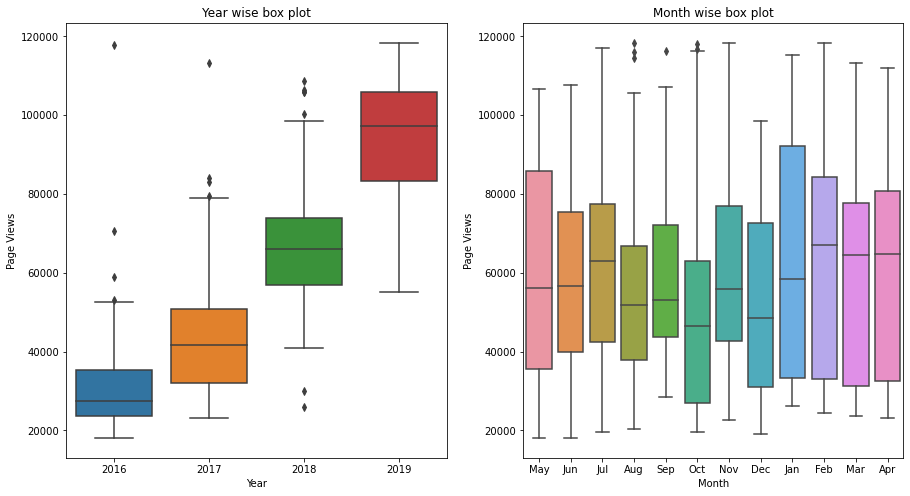

In [9]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
    
#df_box['month_num'] = df_box['date'].dt.month
#df_box = df_box.sort_values['month_num']
    
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8))
axes[0] = sns.boxplot(x = df_box['year'], y = df_box['value'], ax = axes[0])
axes[1] = sns.boxplot(x = df_box['month'], y = df_box['value'], ax = axes[1])

axes[0].set_title('Year wise box plot')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

axes[1].set_title('Month wise box plot')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')